[118297.5  403993.12 295505.29 ... 122979.16 219139.29 220738.33]
ACCURACY: 23260.375287671235


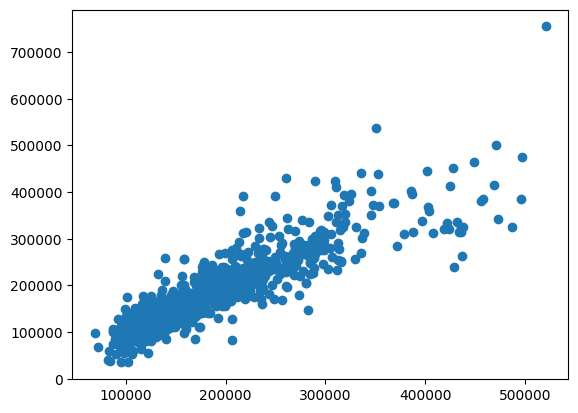

In [1]:
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Import our datasets
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")


# Samples for faster testin

# sample_precentage = 0.5

# test = test.sample(frac=sample_precentage)
# train = train.sample(frac=sample_precentage)


# Our categorical variables
# Testing data
objective_variables = ["SalePrice"]
objective_data = train[objective_variables]


# Training data
training_variables = ["MSSubClass", "LotArea", "LotFrontage", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]
training_data_train = train[training_variables]


# Turn categories into numerical
training_data_train = pd.get_dummies(training_data_train)


# Our imputer
imputer = SimpleImputer()
training_data_train = imputer.fit_transform(training_data_train)


# Split our data
test_x, train_x, test_y, train_y = model_selection.train_test_split(
    training_data_train, 
    objective_data.values.ravel(),
    random_state=60
    )


# Our model
model = RandomForestRegressor() 

model.fit(train_x, train_y)

prediction = model.predict(test_x)


# Get our accuracy
accuracy = mean_absolute_error(test_y, prediction)

print(prediction)
print("ACCURACY: {}".format(accuracy))

plt.scatter(prediction, test_y)
plt.show()



